# Binary Classification Model Training Notebook with XGBoost

In [1]:

# Import necessary libraries
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Importing XGBoost library
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

# Paths to main dataset directory
dataset_dir = '../Competition_data'

# Initialize empty DataFrames for aggregated data
X_train_all = pd.DataFrame()
y_train_all = pd.DataFrame()

# Loop through each dataset folder and load training data
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        X_train_path = os.path.join(folder_path, 'X_train.csv')
        y_train_path = os.path.join(folder_path, 'y_train.csv')
        
        # Concatenate each dataset's training data
        X_train_all = pd.concat([X_train_all, pd.read_csv(X_train_path)], ignore_index=True)
        y_train_all = pd.concat([y_train_all, pd.read_csv(y_train_path)], ignore_index=True)

# Display the combined data
X_train_all.head(), y_train_all.head()


(   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
 0  -0.659247  -0.083739  -0.566116  -0.084240  -0.089862  -0.462229   
 1   0.196560   0.184938   0.347867   0.229415   0.803588   0.618597   
 2  -0.383980   0.631936   1.084821   0.632012   1.167168   1.153074   
 3   0.962083  -0.270897  -0.566116  -0.271678   0.406406   0.618597   
 4  -0.083654   0.986852   1.084821   0.986879   1.351969   1.153074   
 
    Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_88  Feature_89  \
 0  -0.089846  -0.217566  -0.079304   -0.164407  ...         NaN         NaN   
 1   0.775470   0.677312  -0.079304   -0.164407  ...         NaN         NaN   
 2   1.167167   1.110771  -0.079304   -0.164407  ...         NaN         NaN   
 3   0.440842   0.169777  -0.079304   -0.164407  ...         NaN         NaN   
 4   1.351969   1.299255   1.499914    1.502625  ...         NaN         NaN   
 
    Feature_90  Feature_91  Feature_92  Feature_93  Feature_94  Feature_95  \
 0    

## Data Preprocessing

In [2]:

# Check for missing values in the aggregated dataset
print("Missing values in X_train_all:", X_train_all.isnull().sum().sum())

# Scaling the features
scaler = StandardScaler()
X_train_scaled_all = scaler.fit_transform(X_train_all)


Missing values in X_train_all: 1151666


## Model Training with XGBoost (State-of-the-Art)

In [3]:



# Split the aggregated data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled_all, y_train_all, test_size=0.2, random_state=42)

# Initialize and train an XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train_split, y_train_split.values.ravel())

# Evaluate on validation set
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation ROC-AUC Score:", roc_auc_score(y_val, y_val_pred))


Validation Accuracy: 0.8523922633186292
Validation F1 Score: 0.7652455477603886
Validation ROC-AUC Score: 0.8151805728518058


## Evaluation

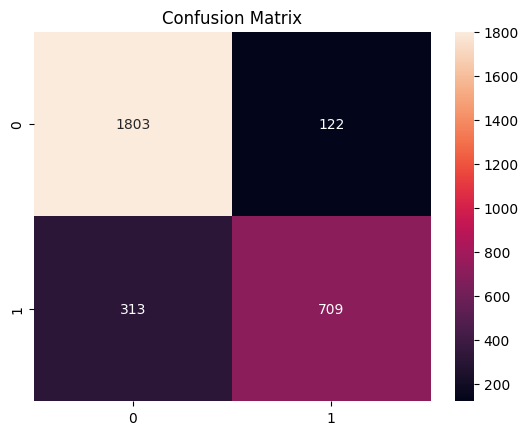

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      1925
         1.0       0.85      0.69      0.77      1022

    accuracy                           0.85      2947
   macro avg       0.85      0.82      0.83      2947
weighted avg       0.85      0.85      0.85      2947



In [4]:

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_val, y_val_pred))


## Prediction and Submission for Each Dataset

In [5]:

# Loop through each dataset folder to generate and save predictions for X_test
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        X_test_path = os.path.join(folder_path, 'X_test.csv')
        
        # Load the test data
        X_test = pd.read_csv(X_test_path)
        
        # Align features of X_test with X_train_all
        for col in X_train_all.columns:
            if col not in X_test.columns:
                X_test[col] = 0  # Add missing columns with zero values
        X_test = X_test[X_train_all.columns]  # Ensure column order matches X_train_all
        
        # Scale the test data
        X_test_scaled = scaler.transform(X_test)
        
        # Generate predictions
        y_test_pred = model.predict(X_test_scaled)
        
        # Save predictions to y_predict.csv
        y_predict = pd.DataFrame(y_test_pred, columns=['target'])
        y_predict.to_csv(os.path.join(folder_path, 'y_predict.csv'), index=False)
